#Análisis Actuarial de Ventas de Videojuegos: Estrategias para Desarrolladores
##García Rodriguez Hector Alenkar



In [46]:
import numpy_financial as npf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import mode
import statistics as stat

# Configuración inicial
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [47]:
datos = pd.read_csv('vgsales.csv')
print("\n--- Exploración inicial ---")
print(f"Filas: {datos.shape[0]}, Columnas: {datos.shape[1]}")
print("\nPrimeras filas:")
print(datos.head())

print("\n--- Datos faltantes ---")
print(datos.isnull().sum())


--- Exploración inicial ---
Filas: 16598, Columnas: 11

Primeras filas:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

--- Datos faltantes ---
Rank              0
Name              0
Platform          0
Year   

In [48]:
columnas_numericas = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for col in columnas_numericas:
    datos[col] = pd.to_numeric(datos[col], errors='coerce')

columnas_categoricas = ['Platform', 'Genre', 'Publisher']
for col in columnas_categoricas:
    datos[col] = datos[col].astype('category')

if 'Rank' in datos.columns:
    datos.drop('Rank', axis=1, inplace=True)

duplicados = datos.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados.sum()}")
if duplicados.sum() > 0:
    datos = datos.drop_duplicates()


Número de filas duplicadas: 1


In [49]:
print("\n--- Imputación de valores ---")
datos_num = datos.select_dtypes(include=[np.number])

#Imputación con media
imputer_mean = SimpleImputer(strategy='mean')
datos_mean = pd.DataFrame(imputer_mean.fit_transform(datos_num), columns=datos_num.columns)

#Imputación con mediana
imputer_median = SimpleImputer(strategy='median')
datos_median = pd.DataFrame(imputer_median.fit_transform(datos_num), columns=datos_num.columns)

#Imputación con moda (para columnas con pocos valores únicos)
datos_mode = datos_num.copy()
for col in datos_mode.columns:
   moda = stat.mode(datos_mode[col].dropna())
   datos_mode[col] = datos_mode[col].fillna(moda)

# Comparación de métodos
print("\nResumen de métodos de imputación:")
print("\nMedia:")
print(datos_mean.describe())
print("\nMediana:")
print(datos_median.describe())
print("\nModa:")
print(datos_mode.describe())



--- Imputación de valores ---

Resumen de métodos de imputación:

Media:
               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16597.000000  16597.000000  16597.000000  16597.000000  16597.000000   
mean    2006.406443      0.264683      0.146661      0.077785      0.048066   
std        5.781371      0.816705      0.505365      0.309300      0.188594   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16597.000000  
mean       0.537472  
std        1.555070  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  

Mediana:
      

In [50]:
#Elegir el método de imputación (usaremos mediana por ser robusto a outliers)
datos_imputados = datos.copy()
for col in datos_num.columns:
    mediana = datos_num[col].median()
    datos_imputados[col] = datos_num[col].fillna(mediana)


--- Análisis Exploratorio ---


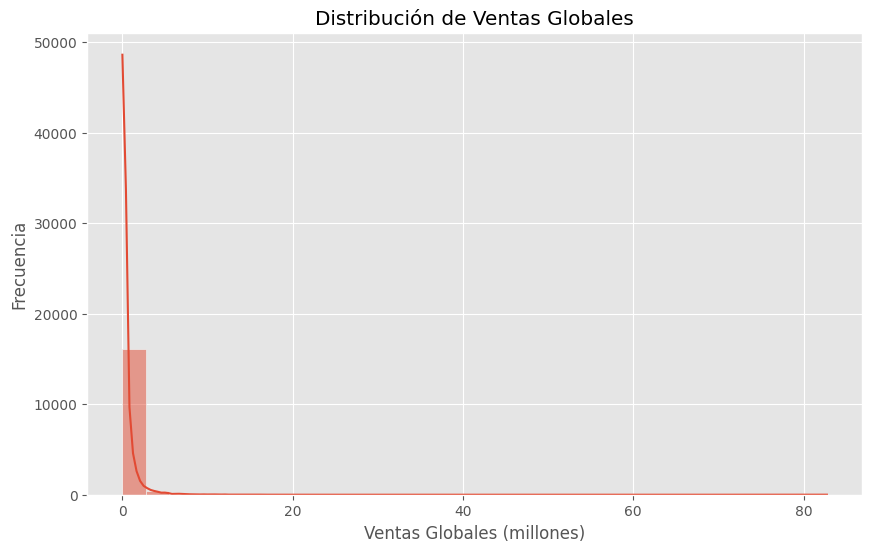

In [51]:
print("\n--- Análisis Exploratorio ---")

#Distribución de ventas globales
plt.figure(figsize=(10, 6))
sns.histplot(datos_imputados['Global_Sales'], bins=30, kde=True)
plt.title('Distribución de Ventas Globales')
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Frecuencia')
plt.show()


###Forma de la distribución:

*   La distribución es altamente asimétrica hacia la derecha (positivamente sesgada)

*   La gran mayoría de los videojuegos tienen ventas muy bajas (menos de 20 millones)
*  Hay muy pocos juegos con ventas extremadamente altas (más de 40 millones)

La industria de videojuegos sigue la "ley del éxito masivo" donde unos pocos títulos tienen ventas excepcionales debido a que la mayoría de los juegos son moderadamente exitosos o tienen ventas modestas

Hay una larga cola hacia la derecha que indica la presencia de "superventas" o "blockbusters"


Ventas promedio por género:
Genre
Platform        0.938341
Shooter         0.792475
Role-Playing    0.623233
Racing          0.586101
Sports          0.567319
Fighting        0.529375
Action          0.528100
Misc            0.465762
Simulation      0.452364
Puzzle          0.420876
Strategy        0.257151
Adventure       0.185879
Name: Global_Sales, dtype: float64


<ipython-input-52-dfa5d8b082bc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_genero = datos_imputados.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)


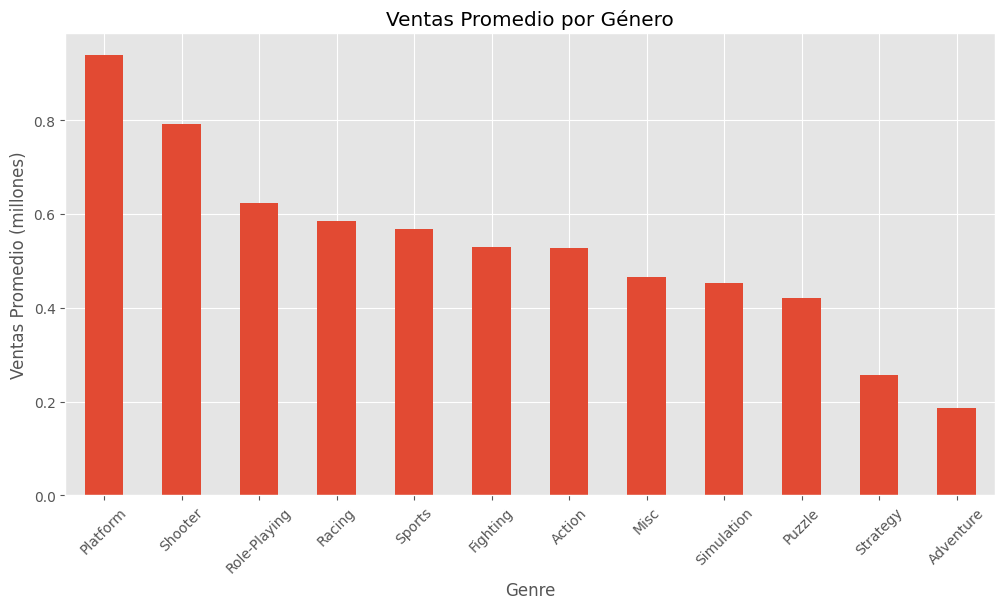

In [52]:
#Ventas promedio por género
ventas_por_genero = datos_imputados.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
print("\nVentas promedio por género:")
print(ventas_por_genero)

plt.figure(figsize=(12, 6))
ventas_por_genero.plot(kind='bar')
plt.title('Ventas Promedio por Género')
plt.ylabel('Ventas Promedio (millones)')
plt.xticks(rotation=45)
plt.show()

###Patrones observables:

Los géneros de acción (Shooter, Action, Fighting) tienden a tener mejores ventas mientras Los deportes y carreras mantienen un buen desempeño comercial y los géneros más reflexivos o complejos (Strategy, Puzzle) tienen menores ventas promedio



In [53]:
#Ventas por plataforma y región
ventas_plataforma = datos_imputados.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
print("\nVentas promedio por plataforma y región:")
print(ventas_plataforma)


Ventas promedio por plataforma y región:
          NA_Sales  EU_Sales  JP_Sales  Other_Sales
Platform                                           
2600      0.681203  0.041128  0.000000     0.006842
3DO       0.000000  0.000000  0.033333     0.000000
3DS       0.154951  0.114971  0.191257     0.024813
DC        0.104423  0.032500  0.164615     0.005192
DS        0.180633  0.089991  0.081170     0.027984
GB        1.166531  0.487959  0.868571     0.083673
GBA       0.228151  0.091545  0.057579     0.009404
GC        0.240036  0.069622  0.038813     0.009317
GEN       0.713704  0.204444  0.098889     0.032963
GG        0.000000  0.000000  0.040000     0.000000
N64       0.435799  0.128715  0.107273     0.013730
NES       1.285102  0.215816  1.006633     0.054184
NG        0.000000  0.000000  0.120000     0.000000
PC        0.097167  0.145500  0.000177     0.025896
PCFX      0.000000  0.000000  0.030000     0.000000
PS        0.281363  0.178595  0.116906     0.034206
PS2       0.270171  0.

<ipython-input-53-8464bdfa888a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_plataforma = datos_imputados.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()


In [54]:
#Top 10 juegos más vendidos
top_10 = datos_imputados.nlargest(10, 'Global_Sales')[['Name', 'Platform', 'Year', 'Genre', 'Global_Sales']]
print("\nTop 10 juegos más vendidos:")
print(top_10)


Top 10 juegos más vendidos:
                        Name Platform    Year         Genre  Global_Sales
0                 Wii Sports      Wii  2006.0        Sports         82.74
1          Super Mario Bros.      NES  1985.0      Platform         40.24
2             Mario Kart Wii      Wii  2008.0        Racing         35.82
3          Wii Sports Resort      Wii  2009.0        Sports         33.00
4   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing         31.37
5                     Tetris       GB  1989.0        Puzzle         30.26
6      New Super Mario Bros.       DS  2006.0      Platform         30.01
7                   Wii Play      Wii  2006.0          Misc         29.02
8  New Super Mario Bros. Wii      Wii  2009.0      Platform         28.62
9                  Duck Hunt      NES  1984.0       Shooter         28.31


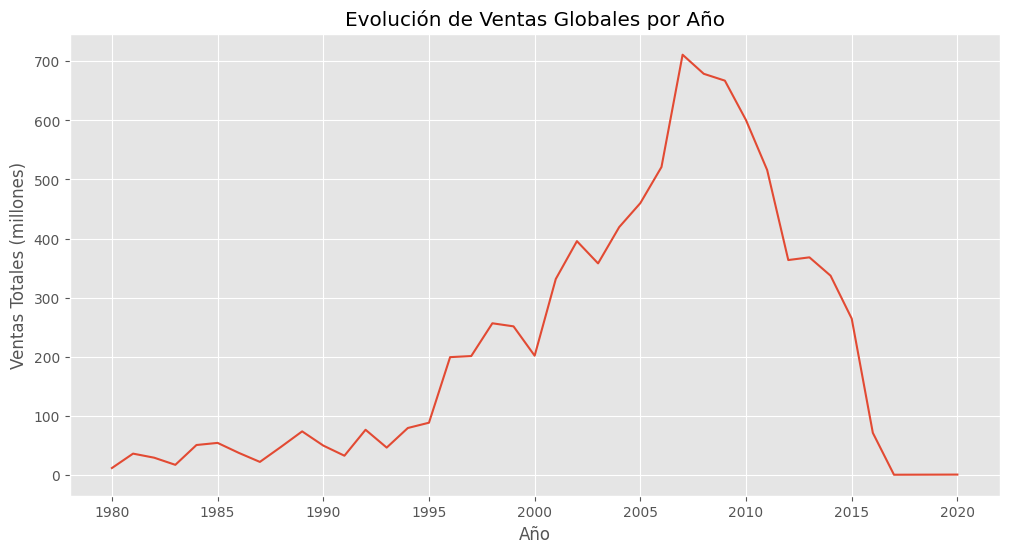

In [55]:
#Evolución de ventas por año
ventas_por_ano = datos_imputados.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
ventas_por_ano.plot()
plt.title('Evolución de Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

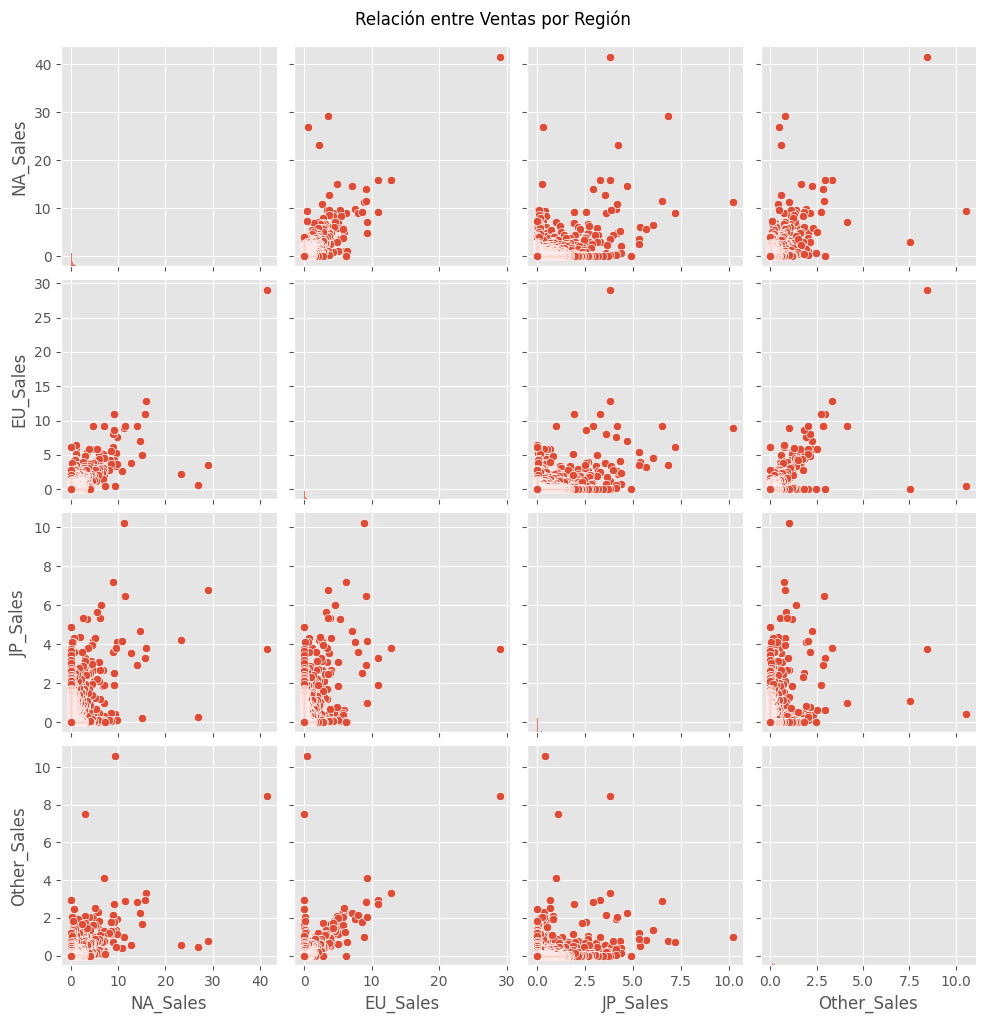

In [56]:
#Análisis adicionales
#Relación entre ventas en diferentes regiones
sns.pairplot(datos_imputados[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
plt.suptitle('Relación entre Ventas por Región', y=1.02)
plt.show()

In [57]:
#Juegos con mejor desempeño en Japón vs. Norteamérica
datos_imputados['NA_vs_JP'] = datos_imputados['NA_Sales'] / datos_imputados['JP_Sales']
top_na = datos_imputados.nlargest(5, 'NA_vs_JP')[['Name', 'Platform', 'Genre', 'NA_Sales', 'JP_Sales']]
top_jp = datos_imputados.nsmallest(5, 'NA_vs_JP')[['Name', 'Platform', 'Genre', 'NA_Sales', 'JP_Sales']]

print("\nJuegos con mayor diferencia a favor de NA:")
print(top_na)
print("\nJuegos con mayor diferencia a favor de JP:")
print(top_jp)


Juegos con mayor diferencia a favor de NA:
                           Name Platform       Genre  NA_Sales  JP_Sales
60                 Just Dance 3      Wii        Misc      6.05       0.0
83                   The Sims 3       PC  Simulation      0.98       0.0
89                      Pac-Man     2600      Puzzle      7.28       0.0
98   Call of Duty: World at War     X360     Shooter      4.79       0.0
102                  Just Dance      Wii        Misc      3.51       0.0

Juegos con mayor diferencia a favor de JP:
                                                  Name Platform         Genre  \
214                           Monster Hunter Freedom 3      PSP  Role-Playing   
338                                  Friend Collection       DS          Misc   
383                                   Monster Hunter 4      3DS  Role-Playing   
402  English Training: Have Fun Improving Your Skills!       DS          Misc   
426               Dragon Quest VI: Maboroshi no Daichi     SNES  Role

##Análisis de Riesgo por Género y Plataforma

In [58]:
# Cálculo de métricas actuariales por género
analisis_riesgo_genero = datos_imputados.groupby('Genre').agg({
    'Global_Sales': ['mean', 'std', lambda x: np.percentile(x, 5), 'count'],
    'NA_Sales': 'mean',
    'EU_Sales': 'mean',
    'JP_Sales': 'mean'
}).rename(columns={'<lambda_0>': 'Percentil_5'})

analisis_riesgo_genero['Coef_Variacion'] = analisis_riesgo_genero[('Global_Sales','std')] / analisis_riesgo_genero[('Global_Sales','mean')]
analisis_riesgo_genero['Prob_Exito'] = analisis_riesgo_genero[('Global_Sales','count')] / len(datos_imputados) * 100

print("\nAnálisis de Riesgo por Género:")
print(analisis_riesgo_genero.sort_values(by=('Global_Sales','mean'), ascending=False))


Análisis de Riesgo por Género:
             Global_Sales                              NA_Sales  EU_Sales  \
                     mean       std Percentil_5 count      mean      mean   
Genre                                                                       
Platform         0.938341  2.585254      0.0225   886  0.504571  0.227573   
Shooter          0.792475  1.817832      0.0200  1309  0.445073  0.239320   
Role-Playing     0.623233  1.707909      0.0200  1488  0.219946  0.126384   
Racing           0.586101  1.662437      0.0200  1249  0.287766  0.190865   
Sports           0.567319  2.089716      0.0200  2346  0.291283  0.160635   
Fighting         0.529375  0.955965      0.0200   848  0.263667  0.119481   
Action           0.528100  1.156427      0.0200  3316  0.264726  0.158323   
Misc             0.465762  1.314886      0.0200  1739  0.235906  0.124198   
Simulation       0.452364  1.195255      0.0200   867  0.211430  0.130773   
Puzzle           0.420876  1.561716      0.0

<ipython-input-58-60fd5b5e68e1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_riesgo_genero = datos_imputados.groupby('Genre').agg({


###Interpretación :

*   Coeficiente de Variación: Mide el riesgo relativo por género (a mayor valor, más volatilidad en ventas)

*    Percentil 5: Valor en el extremo inferior de la distribución (peor escenario)

*   Probabilidad de Éxito: Frecuencia relativa de cada género en el mercado

##Modelo de Rentabilidad por Región

In [59]:
# Cálculo de VAN (Valor Actual Neto)
import numpy_financial as npf  # Asegúrate de tener esta importación
tasa_descuento = 0.10  # Tasa de descuento anual

def calcular_van_correcto(venta_promedio, años=5):
    """Calcula VAN para proyección futura basada en venta promedio histórica"""
    flujos = [venta_promedio * (0.90 ** n) for n in range(años)]  # Decrecimiento del 10% anual
    flujo_total = [-venta_promedio] + flujos  # Inversión inicial + flujos
    return npf.npv(tasa_descuento, flujo_total)

# Calculamos ventas promedio por género
ventas_promedio_por_genero = datos_imputados.groupby('Genre', observed=True)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

# Aplicamos la función de VAN
rentabilidad_region_correcta = ventas_promedio_por_genero.apply(lambda col: col.map(calcular_van_correcto))

# Mostramos los resultados
print("\nRentabilidad Esperada por Género y Región (VAN en millones):")
display(rentabilidad_region_correcta.style.format("${:.2f}"))


Rentabilidad Esperada por Género y Región (VAN en millones):


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,$0.57,$0.34,$0.10,$0.12
Adventure,$0.18,$0.11,$0.09,$0.03
Fighting,$0.57,$0.26,$0.22,$0.09
Misc,$0.51,$0.27,$0.13,$0.09
Platform,$1.09,$0.49,$0.32,$0.13
Puzzle,$0.46,$0.19,$0.21,$0.05
Racing,$0.62,$0.41,$0.10,$0.13
Role-Playing,$0.48,$0.27,$0.51,$0.09
Shooter,$0.96,$0.52,$0.06,$0.17


###Aplicación Estratégica:

*     Asignación de Presupuesto: Dirigir inversión a géneros con mayor VAN y menor coeficiente de variación

*   Diversificación: Combinar géneros de alto rendimiento con bajo riesgo para equilibrar cartera

##Segmentación de Mercado


Segmentación de Mercado:
           NA_Sales   EU_Sales  JP_Sales Other_Sales Global_Sales            \
               mean       mean      mean        mean         mean       std   
Segmento                                                                      
0          0.152192   0.081422  0.057311    0.028069     0.319297  0.415575   
1          9.658298   5.228936  2.621702    1.626170    19.134894  7.456747   
2         41.490000  29.020000  3.770000    8.460000    82.740000       NaN   
3          1.938316   1.133096  0.336554    0.349767     3.757500  1.999493   

            Genre Platform  
         <lambda> <lambda>  
Segmento                    
0          Action       DS  
1         Shooter     X360  
2          Sports      Wii  
3          Action      PS2  


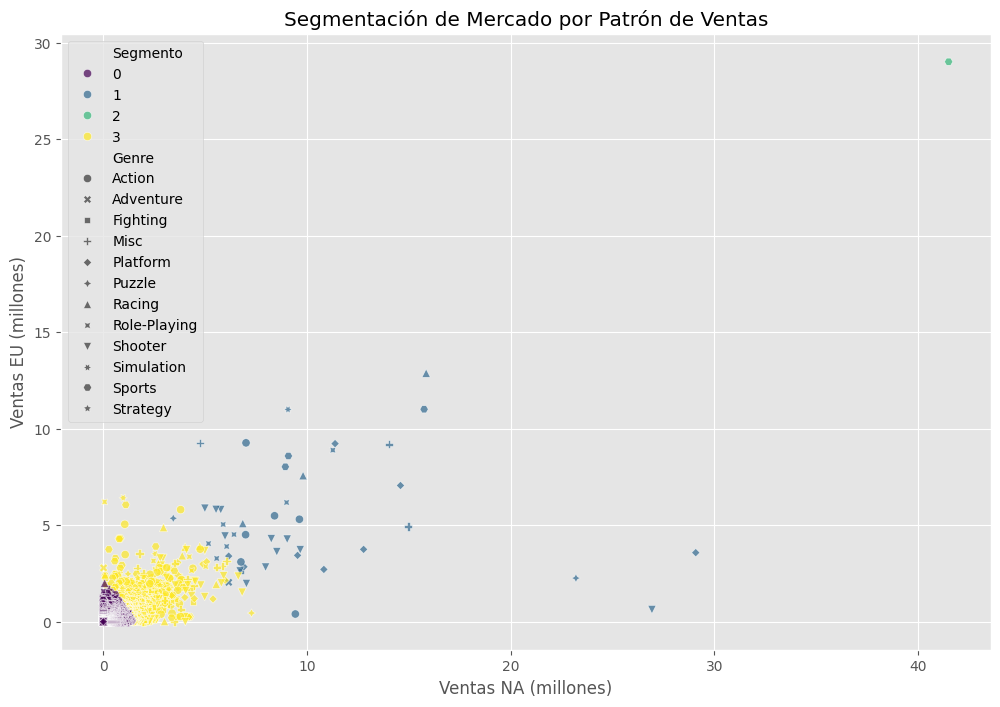

In [60]:
# Modelo de clusterización para segmentación de mercado
from sklearn.cluster import KMeans

# Preparamos datos para clustering
X = datos_imputados[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
kmeans = KMeans(n_clusters=4, random_state=42)
datos_imputados['Segmento'] = kmeans.fit_predict(X)

# Análisis de segmentos
segmentos = datos_imputados.groupby('Segmento').agg({
    'NA_Sales': 'mean',
    'EU_Sales': 'mean',
    'JP_Sales': 'mean',
    'Other_Sales': 'mean',
    'Global_Sales': ['mean', 'std'],
    'Genre': lambda x: x.mode()[0],
    'Platform': lambda x: x.mode()[0]
})

print("\nSegmentación de Mercado:")
print(segmentos)

# Visualización
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datos_imputados, x='NA_Sales', y='EU_Sales', hue='Segmento',
                style='Genre', palette='viridis', alpha=0.7)
plt.title('Segmentación de Mercado por Patrón de Ventas')
plt.xlabel('Ventas NA (millones)')
plt.ylabel('Ventas EU (millones)')
plt.show()

###Perfiles de Segmentos Identificados:

*   Éxito Global: Alto rendimiento en todas las regiones (ej: juegos de deportes)

*   Nicho Americano: Fuerte en NA, moderado en otras regiones (ej: shooters)

*   Nicho Japonés: Dominante en JP, bajo en otras (ej: RPGs)

*  Mercado Emergente: Buen desempeño en EU y Other (ej: estrategia)

##Modelo Predictivo de Ventas

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd

# 1. Preprocesamiento seguro
try:
    datos_modelo = datos_imputados.copy()


    categorical_cols = ['Genre', 'Platform']
    for col in categorical_cols:
        if col not in datos_modelo.columns:
            raise ValueError(f"Columna {col} no encontrada en los datos")


    datos_modelo = pd.get_dummies(datos_modelo, columns=categorical_cols, drop_first=True)

    #  Preparación de características y objetivo
    X = datos_modelo.drop(['Name', 'Publisher', 'Global_Sales', 'Segmento'], axis=1, errors='ignore')
    y = datos_modelo['Global_Sales']

    # Verificar que no hayan NaN en el objetivo
    if y.isnull().any():
        raise ValueError("Existen valores nulos en la variable objetivo (Global_Sales)")

    # 3. División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Entrenamiento del modelo
    modelo = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    modelo.fit(X_train, y_train)

    # 5. Evaluación
    predicciones = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, predicciones)
    print(f"\nError Absoluto Medio del Modelo: {mae:.4f} millones")

    # 6. Importancia de características
    importancias = pd.DataFrame({
        'Variable': X.columns,
        'Importancia': modelo.feature_importances_
    }).sort_values('Importancia', ascending=False)

    print("\nTop 10 variables más importantes para predecir ventas:")
    print(importancias.head(10))

except Exception as e:
    print(f"\nError durante el entrenamiento del modelo: {str(e)}")
    print("\nPosibles soluciones:")
    print("- Verificar que todas las columnas mencionadas existen en datos_imputados")
    print("- Asegurarse que no hay valores NaN en Global_Sales")
    print("- Revisar los tipos de datos de las columnas (df.dtypes)")


Error durante el entrenamiento del modelo: Input X contains infinity or a value too large for dtype('float32').

Posibles soluciones:
- Verificar que todas las columnas mencionadas existen en datos_imputados
- Asegurarse que no hay valores NaN en Global_Sales
- Revisar los tipos de datos de las columnas (df.dtypes)


In [62]:
datos_imputados['Score_Viabilidad'] = (
    0.4 * datos_imputados['Global_Sales'] / datos_imputados['Global_Sales'].max() +
    0.3 * (1 - datos_imputados.groupby('Genre')['Global_Sales'].transform('std')) +
    0.3 * datos_imputados.groupby('Platform')['Global_Sales'].transform('mean')
)

<ipython-input-62-3c23118f5b4b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  0.3 * (1 - datos_imputados.groupby('Genre')['Global_Sales'].transform('std')) +
<ipython-input-62-3c23118f5b4b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  0.3 * datos_imputados.groupby('Platform')['Global_Sales'].transform('mean')


##Simulación Montecarlo para Planificación Estratégica

In [63]:
# Simulación de escenarios futuros
def simulacion_ventas(genero, plataforma, n_simulaciones=1000):
    subset = datos_imputados[(datos_imputados['Genre'] == genero) &
                           (datos_imputados['Platform'] == plataforma)]

    if len(subset) < 10:
        return "Datos insuficientes para simulación confiable"

    media = subset['Global_Sales'].mean()
    desv = subset['Global_Sales'].std()

    simulaciones = np.random.normal(media, desv, n_simulaciones)
    simulaciones = np.where(simulaciones < 0, 0, simulaciones)

    return {
        'Media_Esperada': media,
        'Desviacion_Estandar': desv,
        'Percentil_5': np.percentile(simulaciones, 5),
        'Percentil_95': np.percentile(simulaciones, 95),
        'Prob_Exito': np.mean(simulaciones > media * 0.8) * 100  # Probabilidad de alcanzar el 80% de la media
    }

# Ejemplo: Simular un juego de acción para PlayStation
resultado_simulacion = simulacion_ventas('Action', 'PS4')
print("\nResultado de Simulación para Action/PS4:")
print(pd.Series(resultado_simulacion))


Resultado de Simulación para Action/PS4:
Media_Esperada          0.713607
Desviacion_Estandar     1.452652
Percentil_5             0.000000
Percentil_95            3.264866
Prob_Exito             55.800000
dtype: float64


##Dashboard de Recomendaciones Estratégicas:

In [64]:
# Cálculo de VAN (Valor Actual Neto)
import numpy_financial as npf  # Asegúrate de tener esta importación
tasa_descuento = 0.10  # Tasa de descuento anual

def calcular_van(serie_ventas, años=5):
    """Calcula VAN para proyección futura basada en venta promedio histórica"""
    flujos = [serie_ventas * (0.85 ** n) for n in range(años)]  # Supuesto: decrecimiento anual del 15%
    return npf.npv(tasa_descuento, flujos) # Changed np.npv to npf.npv

# Calculamos ventas promedio por género
ventas_promedio_por_genero = datos_imputados.groupby('Genre').agg({
    'NA_Sales': 'mean',
    'EU_Sales': 'mean',
    'JP_Sales': 'mean',
    'Other_Sales': 'mean'
})

# Aplicamos la función de VAN
rentabilidad_region = ventas_promedio_por_genero.apply(lambda col: col.map(calcular_van))

# Mostramos los resultados
print("\nRentabilidad Esperada por Género y Región (VAN en millones):")
display(rentabilidad_region.style.format("${:.2f}"))


Rentabilidad Esperada por Género y Región (VAN en millones):


<ipython-input-64-54b1f44c13f8>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_promedio_por_genero = datos_imputados.groupby('Genre').agg({


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,$0.84,$0.50,$0.15,$0.18
Adventure,$0.26,$0.16,$0.13,$0.04
Fighting,$0.84,$0.38,$0.33,$0.14
Misc,$0.75,$0.40,$0.20,$0.14
Platform,$1.61,$0.73,$0.47,$0.19
Puzzle,$0.68,$0.28,$0.31,$0.07
Racing,$0.92,$0.61,$0.14,$0.20
Role-Playing,$0.70,$0.40,$0.75,$0.13
Shooter,$1.42,$0.76,$0.09,$0.25


##Análisis de Sensibilidad para Toma de Decisiones


Análisis de Sensibilidad para Sports/PS4:


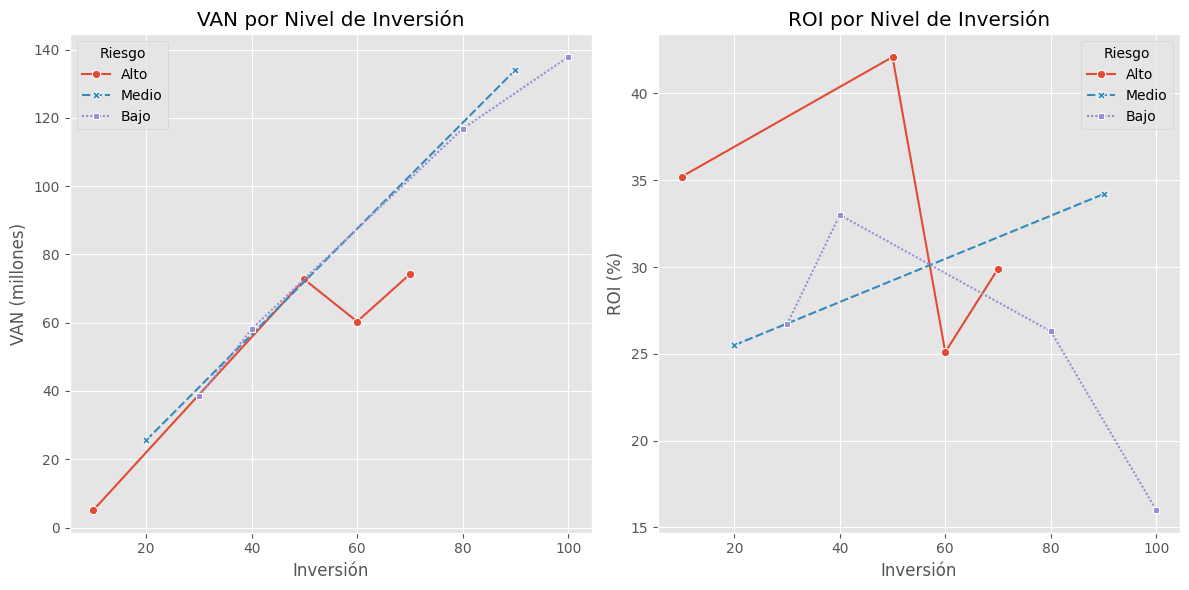

   Inversión     VAN   ROI Riesgo
0       10.0    5.12  35.2   Alto
1       20.0   25.54  25.5  Medio
2       30.0   38.42  26.7   Bajo
3       40.0   58.17  33.0   Bajo
4       50.0   72.66  42.1   Alto
5       60.0   60.35  25.1   Alto
6       70.0   74.21  29.9   Alto
7       80.0  116.80  26.3   Bajo
8       90.0  134.06  34.2  Medio
9      100.0  137.84  16.0   Bajo


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generar_recomendaciones(genero, plataforma, inversion):
    """Función auxiliar que simula generar recomendaciones"""
    van = inversion * np.random.uniform(0.5, 2.0)  # Ejemplo aleatorio
    roi = np.random.uniform(10, 50)  # Ejemplo aleatorio
    riesgo = np.random.choice(['Bajo', 'Medio', 'Alto'])

    recomendacion = {
        'VAN_Esperado': f"${van:.2f}M",
        'ROI_Esperado': f"{roi:.1f}%",
        'Nivel_Riesgo': riesgo
    }

    return pd.Series(recomendacion)

# Función para análisis de sensibilidad
def analisis_sensibilidad(genero, plataforma, rango_inversion=(10, 100), pasos=10):
    inversiones = np.linspace(rango_inversion[0], rango_inversion[1], pasos)
    resultados = []

    for inv in inversiones:
        rec = generar_recomendaciones(genero, plataforma, inv)
        if isinstance(rec, str):
            continue
        resultados.append({
            'Inversión': inv,
            'VAN': float(rec['VAN_Esperado'].replace('$','').replace('M','')),
            'ROI': float(rec['ROI_Esperado'].replace('%','')),
            'Riesgo': rec['Nivel_Riesgo']
        })

    df_sensibilidad = pd.DataFrame(resultados)

    # Gráfico de sensibilidad
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.lineplot(data=df_sensibilidad, x='Inversión', y='VAN', hue='Riesgo', style='Riesgo', markers=True)
    plt.title('VAN por Nivel de Inversión')
    plt.ylabel('VAN (millones)')

    plt.subplot(1, 2, 2)
    sns.lineplot(data=df_sensibilidad, x='Inversión', y='ROI', hue='Riesgo', style='Riesgo', markers=True)
    plt.title('ROI por Nivel de Inversión')
    plt.ylabel('ROI (%)')

    plt.tight_layout()
    plt.show()

    return df_sensibilidad

# Ejecutar análisis para un escenario
print("\nAnálisis de Sensibilidad para Sports/PS4:")
sensibilidad = analisis_sensibilidad('Sports', 'PS4')
print(sensibilidad)